In [1]:
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr 
from glob import glob
import numpy as np
from matplotlib.colors import ListedColormap
from skimage.measure import regionprops
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.rcParams["animation.html"] = "jshtml"

In [2]:
### NWS Reflectivity Colors (courtesy MetPy library):
c5 =  (0.0,                 0.9254901960784314, 0.9254901960784314)
c10 = (0.00392156862745098, 0.6274509803921569, 0.9647058823529412)
c15 = (0.0,                 0.0,                0.9647058823529412)
c20 = (0.0,                 1.0,                0.0)
c25 = (0.0,                 0.7843137254901961, 0.0)
c30 = (0.0,                 0.5647058823529412, 0.0)
c35 = (1.0,                 1.0,                0.0)
c40 = (0.9058823529411765,  0.7529411764705882, 0.0)
c45 = (1.0,                 0.5647058823529412, 0.0)
c50 = (1.0,                 0.0,                0.0)
c55 = (0.8392156862745098,  0.0,                0.0)
c60 = (0.7529411764705882,  0.0,                0.0)
c65 = (1.0,                 0.0,                1.0)
c70 = (0.6,                 0.3333333333333333, 0.788235294117647)
c75 = (0.0,                 0.0,                0.0) 

nws_dz_cmap = matplotlib.colors.ListedColormap([c20, c25, c30, c35, c40, c45, 
                 c50, c55, c60, c65, c70])
dz_levels_nws = np.arange(20.0,80.,5.)

In [3]:
def label_centroid(x, y, ax, object_props, storm_modes=None, converter=None):
    """Place object label on object's centroid"""
    for region in object_props:
        x_cent,y_cent = region.centroid
        x_cent=int(x_cent)
        y_cent=int(y_cent)
        xx, yy = x[x_cent,y_cent], y[x_cent,y_cent]
        
        if storm_modes is None:
            fontsize = 6.5 if region.label >= 10 else 8
            txt = region.label
        else:
            fontsize=4
            coords = region.coords
            ind = int(np.max(storm_modes[coords[:,0], coords[:,1]]))
            txt = converter[ind] 
          
        ax.text(xx,yy,
                    txt,
                    fontsize=fontsize,
                    ha='center',
                    va='center',
                    color = 'k'
                    )    

def plot_storm_labels(x, y, labels, ax=None, alpha=1.0):
    """ Plot Storm Labels """
    if ax is None:
        f, ax = plt.subplots(figsize=(5, 4), dpi=150, facecolor='w', edgecolor='k')
    
    label_props = regionprops(labels, labels)
    
    labels = np.ma.masked_where(labels==0, labels)
    c = ax.pcolormesh(x, y, labels, cmap='tab20', vmin=1, vmax=np.max(labels), alpha=alpha, shading='auto')
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(alpha=0.5, ls='dashed')
    
    label_centroid(x, y, ax, label_props) 
    
    return ax

Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes


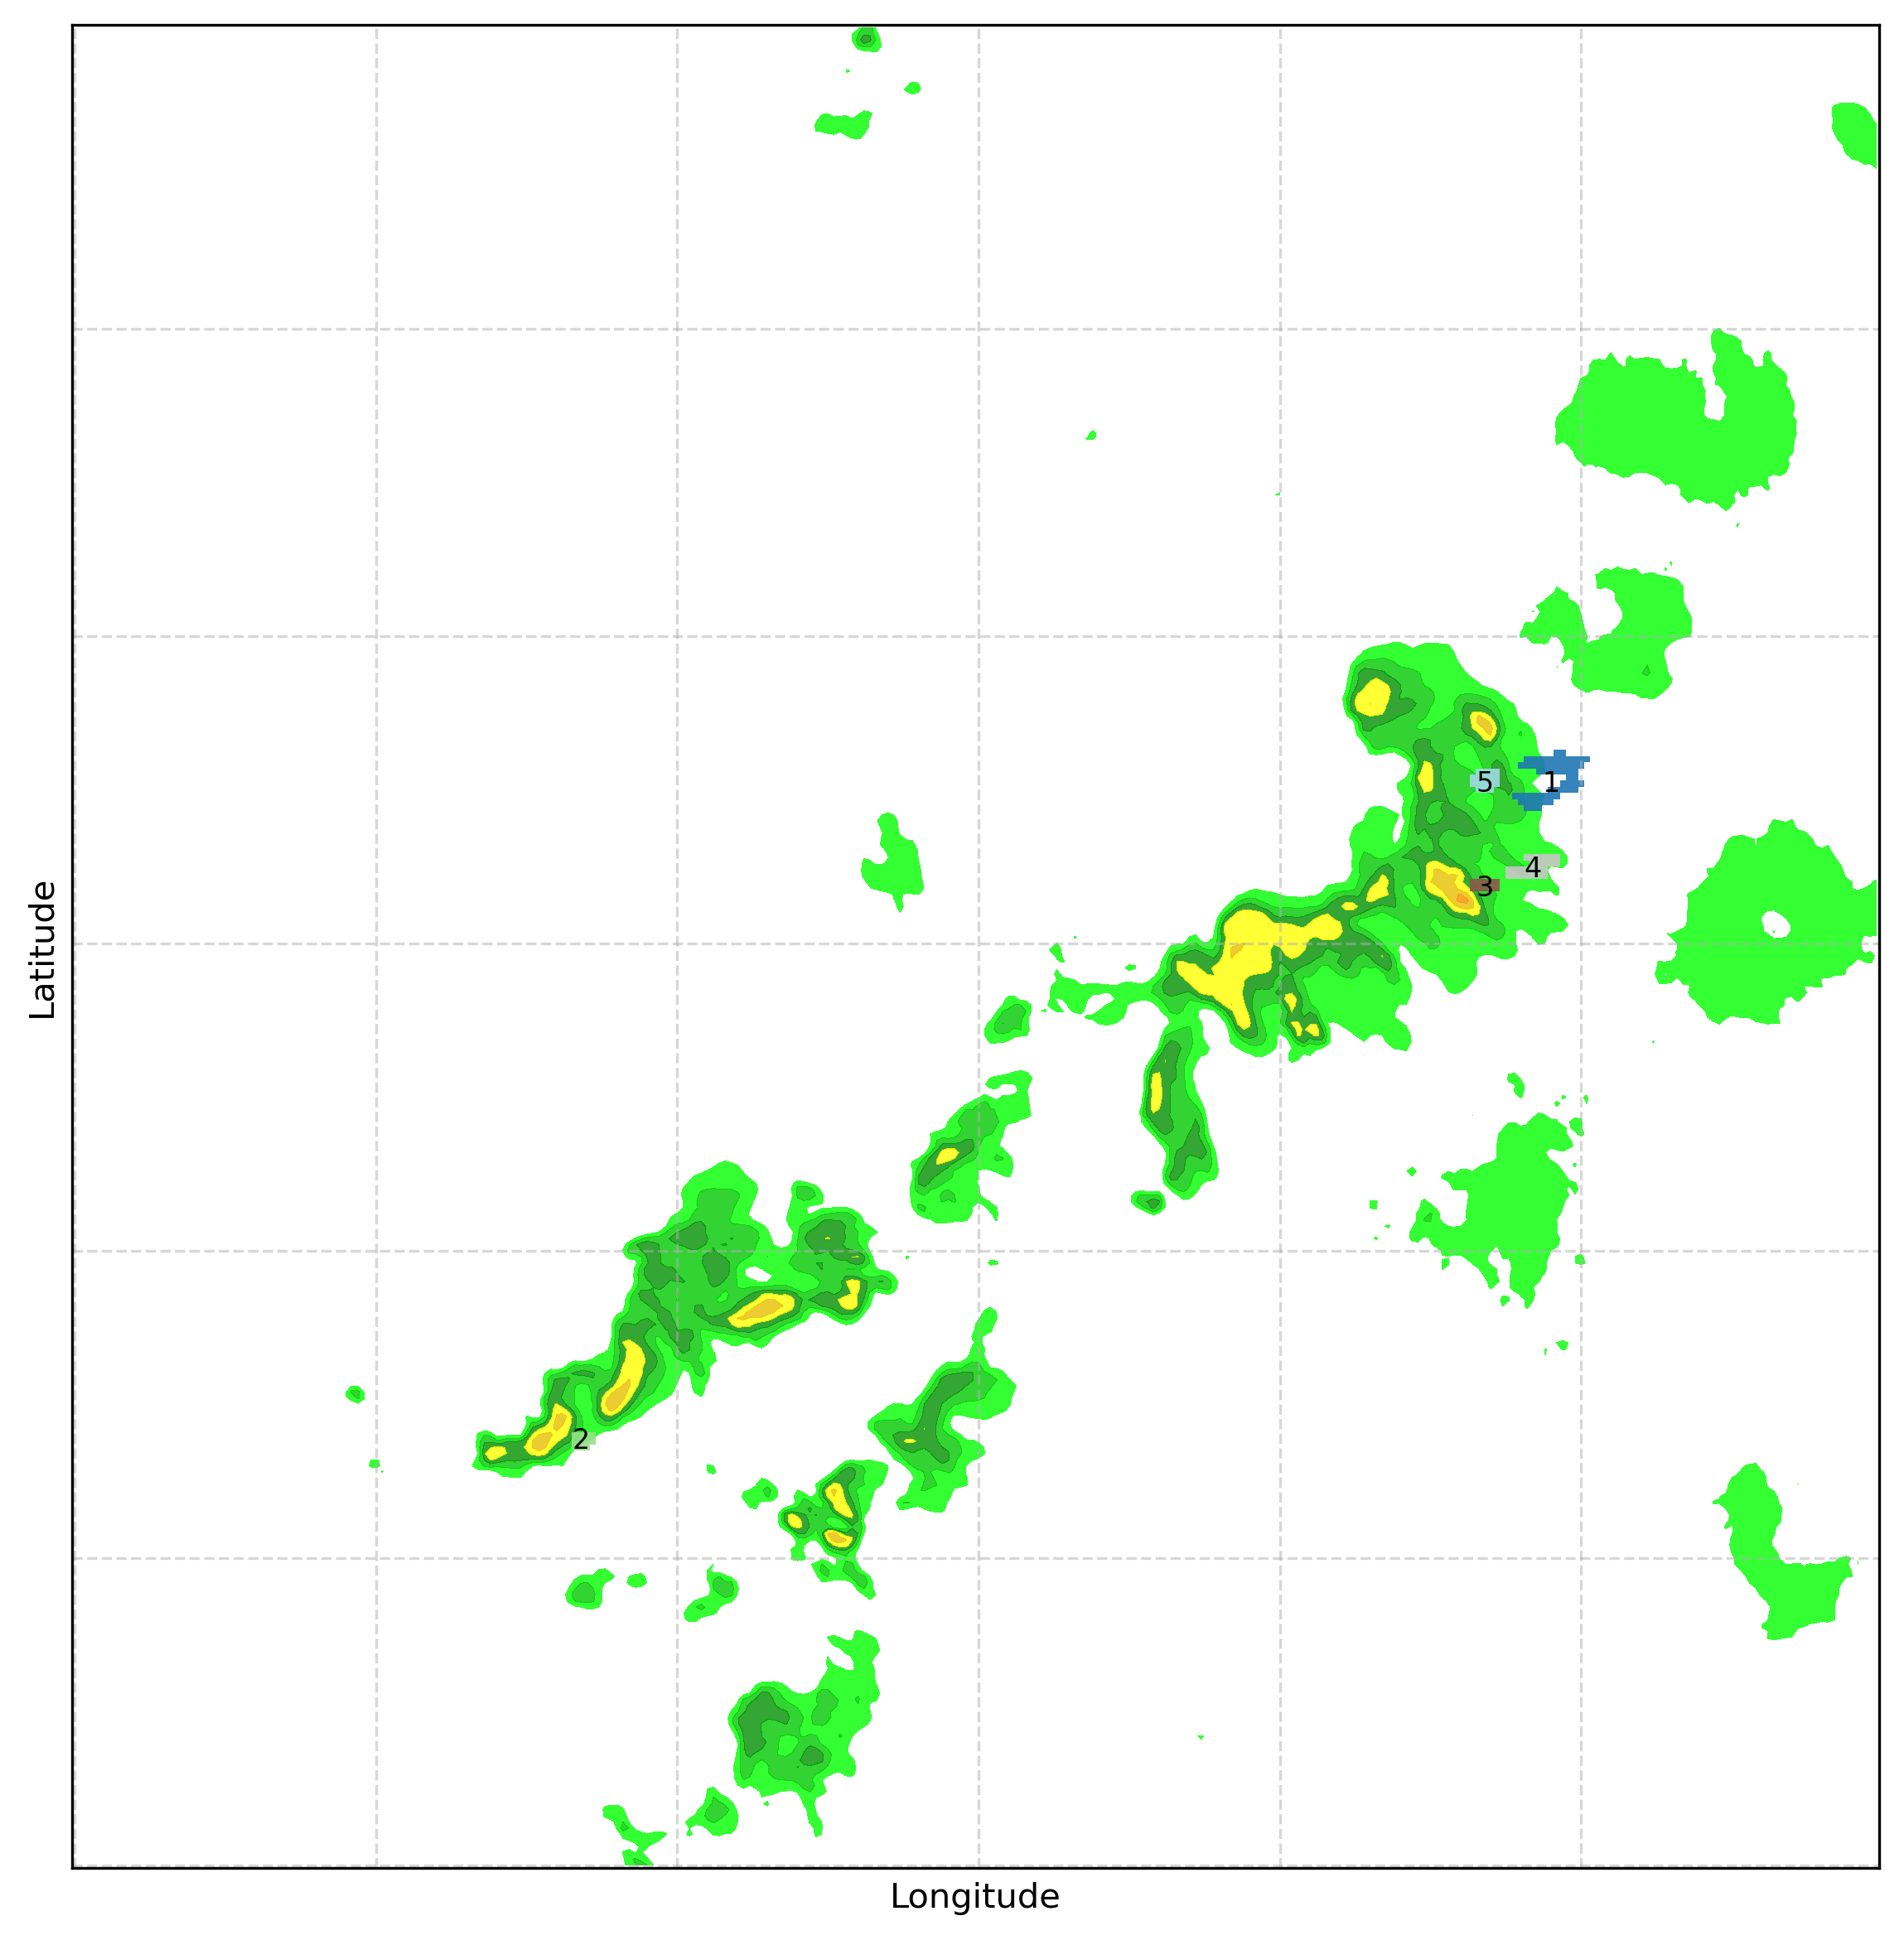

In [18]:
fig, ax = plt.subplots(dpi=300, figsize=(8,8))

def animate(i):
    ax.clear()
    xx, yy = np.meshgrid(range(300), range(300))
    try:
        mrms_file = glob(f'/work/brian.matilla/WOFS_2021/MRMS/RAD_AZS_MSH_AGG/20210507/0000/wofs_RAD_{i+12:02d}*')[0]
        mrms_ds = xr.load_dataset(mrms_file, decode_times=False)
        dbz = mrms_ds['dz_cress'].values
        ax.contourf(xx, yy, np.ma.masked_where(dbz<10, dbz), levels=dz_levels_nws, cmap=nws_dz_cmap, alpha=0.8) 
    except Exception as e:
        print('Yes')
        #continue
    
    track_file = glob(f'/work/mflora/SummaryFiles/20210507/0000/wofs_ENSEMBLETRACKS_{i+6:02d}*')[0]    
    track_ds = xr.load_dataset(track_file, decode_times=False)
    tracks = track_ds['w_up__ensemble_tracks'].values 
    plot_storm_labels(xx, yy, tracks, ax=ax, alpha=0.9)
    
# call the animator. blit=True means only re-draw the parts that have changed.
plt.tight_layout()
anim = FuncAnimation(fig, animate, frames=30, interval=200, repeat=True, blit=False)
HTML(anim.to_jshtml())
anim.save(f'tracks_20210507.gif', writer='pillow', fps=5)